# Task 3
# Iris Classification :Problem Statement: 
Develop a ML Model for classifying iris
flowers based on their features using
Python, scikit-learn, and TensorFlow.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [13]:
x_train.shape

(105, 4)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [17]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100


4/4 - 1s - loss: 1.0815 - accuracy: 0.4190 - 1s/epoch - 369ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0657 - accuracy: 0.4571 - 20ms/epoch - 5ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0113 - accuracy: 0.5048 - 25ms/epoch - 6ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0040 - accuracy: 0.5714 - 21ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9159 - accuracy: 0.5810 - 27ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9262 - accuracy: 0.5810 - 18ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8441 - accuracy: 0.6381 - 27ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8047 - accuracy: 0.6667 - 20ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7903 - accuracy: 0.7619 - 21ms/epoch - 5ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7700 - accuracy: 0.6857 - 24ms/epoch - 6ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7204 - accuracy: 0.7714 - 20ms/epoch - 5ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6979 - accuracy: 0.7429 - 26ms/epoch - 7ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6589 - accuracy

In [20]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 12ms/step
[[9.9997854e-01 9.3371000e-06 1.2166637e-05]
 [1.3013043e-02 9.4990844e-01 3.7078585e-02]
 [9.9987817e-01 8.0923041e-05 4.0919553e-05]
 [1.3861989e-03 2.8787779e-02 9.6982598e-01]
 [9.9974853e-01 1.6940122e-04 8.2148181e-05]]


In [21]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [22]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9555555555555556


In [24]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

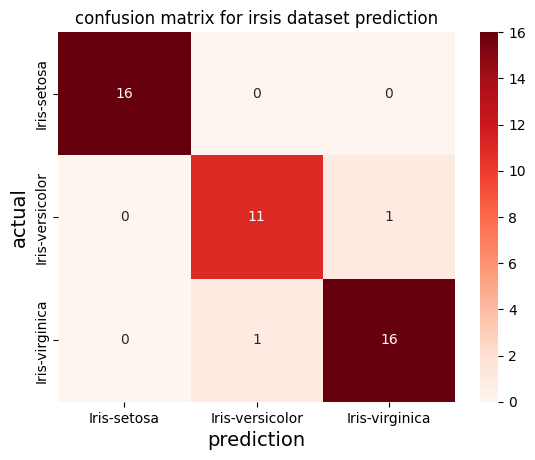

In [25]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)


# Task 3 Completed!!!!